# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [20]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [21]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [22]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4212,Apocalypse Now,1979,Chief Phillips,man,1414,0.067935,42.0,16.0,1676
17336,Gone Girl,2014,Tommy O'Hara,man,152,0.013504,37.0,178.0,6271
22682,Monsters University,2013,Greek Council P,woman,279,0.042209,29.0,286.0,9017
19785,"Jeff, Who Lives at Home",2011,Paul,man,111,0.019450,NaN,4.0,7624
22606,Life on Liberty Street,2004,Eleanor,woman,869,0.133262,NaN,NaN,8972
7145,The Grifters,1990,Bobo Justus,man,906,0.052340,66.0,27.0,2455
9759,The Producers,2005,Max Bialystock,man,7536,0.440341,49.0,26.0,3141
6084,Dogma,1999,Azrael,man,2278,0.069447,29.0,52.0,2172
20532,Final Destination 3,2006,Minister,man,159,0.019495,NaN,71.0,7904
21173,Joy,2015,Valerie,woman,225,0.015718,NaN,57.0,8196


Generate information about all the columns in the data 

In [23]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

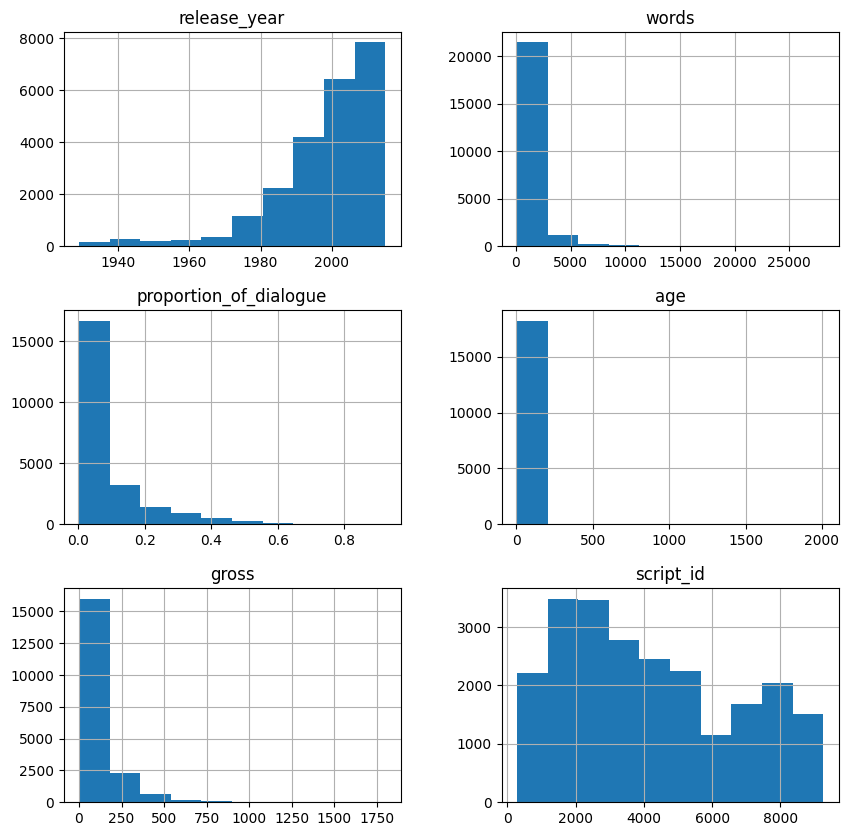

In [24]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [25]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

I notice that more and more films were released at the year increased. 
Most movie have 20,000+ words, but a few have a very few.
All of the movies fall into the same age range.

## Drop Rows

In [26]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [27]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [28]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [29]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [30]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [31]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [32]:
film_filter = film_df['title'] == "Borderland"

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [33]:
film_df[film_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
19222,Borderland,2007,Ed,man,1320,0.190147,30.0,NaN,7351
19223,Borderland,2007,Henry,man,2021,0.291126,29.0,NaN,7351
19224,Borderland,2007,Lupe,woman,188,0.027082,30.0,NaN,7351
19225,Borderland,2007,Mario,man,167,0.024056,29.0,NaN,7351
19226,Borderland,2007,Phil,man,798,0.114952,28.0,NaN,7351
19227,Borderland,2007,Randall,man,784,0.112936,36.0,NaN,7351
19228,Borderland,2007,Santillan,man,303,0.043647,40.0,NaN,7351
19229,Borderland,2007,Ulises,man,669,0.096370,54.0,NaN,7351
19230,Borderland,2007,Valeria,woman,571,0.082253,24.0,NaN,7351


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [34]:
character_filter = film_df['character'] == "Valeria"

In [35]:
film_df[character_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
19230,Borderland,2007,Valeria,woman,571,0.082253,24.0,NaN,7351


### ❓ How does this data align with your experience/knowledge of the film?

I haven't seen Borderland, but a quick google search showed me that this information seems accurate.

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

Enter your response

It was very cool to see the data of a film that you wouldn't normally consider displayed. I also believe this can, and does, have a lot of applications in data analysis today. I don't believe that I would have done anything differently.

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [39]:
film_df = film_df.sort_values("proportion_of_dialogue", ascending=False)
film_df.head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7242,Happy Feet,2006,Mumble,man,2677,0.923422,25.0,262.0,2483
16371,The End of the Tour,2015,David Lipsky,man,3117,0.911137,32.0,3.0,5485
21092,Duel,1971,David Mann,man,2660,0.881086,47.0,NaN,8164
3650,127 Hours,2010,Aron Ralston,man,4336,0.842760,32.0,20.0,1520
22236,Alfie,2004,Alfie,man,5852,0.814815,32.0,18.0,8683
21663,Mala Noche,1986,Walt,man,2093,0.810612,NaN,NaN,8423
1019,Duck Soup,1933,Groucho,man,3697,0.730344,NaN,NaN,873
4569,The Battle of Algiers,1966,Col. Mathieu,man,4962,0.723113,44.0,6.0,1780
17750,1408,2007,Mike Enslin,man,2338,0.703581,41.0,91.0,6537
18138,Jumpin' Jack Flash,1986,Terry Dolittle,woman,4722,0.699452,31.0,60.0,6798


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [40]:
film_df = film_df.sort_values("proportion_of_dialogue", ascending=True)
film_df.head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
5283,Casino,1995,Piscano'S Wife,woman,104,0.001537,NaN,84.0,1963
5272,Casino,1995,Frankie Avalon,man,106,0.001566,56.0,84.0,1963
5291,Casino,1995,Vinny Forlano,man,112,0.001655,NaN,84.0,1963
5262,Casino,1995,Cashier,woman,114,0.001684,NaN,84.0,1963
5277,Casino,1995,La Banker,man,114,0.001684,61.0,84.0,1963
5286,Casino,1995,Security Guard,man,116,0.001714,55.0,84.0,1963
5292,Casino,1995,Winner,man,116,0.001714,NaN,84.0,1963
8031,JFK,1991,Prison Guard,man,106,0.001802,NaN,145.0,2682
5258,Casino,1995,Anna Scott,woman,124,0.001832,NaN,84.0,1963
5257,Casino,1995,Amy Rothstein (,woman,130,0.001921,NaN,84.0,1963


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [42]:
film_df = film_df.sort_values("words", ascending=True)
film_df.head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
21869,Transcendence,2014,Martin,man,101,0.012063,44.0,24.0,8525
15725,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Maugrim,man,101,0.021734,47.0,396.0,5300
16342,Testament of Youth,2014,Mrs. Leighton,woman,101,0.012245,49.0,1.0,5478
18487,Inside Man,2006,Miriam Douglas,woman,101,0.008012,NaN,117.0,6968
16708,The Green Mile,1999,Arlen Bitterbuc,man,101,0.008142,47.0,234.0,5895
15233,Sweeney Todd: The Demon Barber of Fleet Street,2007,Happy Customer',woman,101,0.011676,NaN,66.0,5083
22481,"Good Night, and Good Luck.",2005,Jesse Zousmer,man,101,0.011675,42.0,42.0,8881
12809,Flightplan,2005,Julia,woman,101,0.019360,7.0,121.0,4220
12242,El cantante,2006,Madrina,woman,101,0.014251,NaN,10.0,3986
16473,The Theory of Everything,2014,Swiss Doctor,man,101,0.017104,46.0,38.0,5502


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I notice that the words is the same for all 20 records, so this sort and head method call doesn't tell us much.

## Groupby

Group by film and then calculate the sum total for every column.

In [44]:
film_df.groupby("title").sum()

,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,,,
(500) Days of Summer,26117,SarahCo-Worker 3DoucheManAlisonAutumn - Girl A...,womanmanmanmanwomanwomanmanmanwomanmanmanwomanman,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,Mr. ChapinTeacherDerekChastityMandellaWalter S...,manmanmanwomanwomanmanmanmanmanwomanmanwoman,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,WinslowSamJohnSheriffRandallClemensTreachJonus...,manmanmanmanmanmanmanmanmanwomanmanmanmanwoman...,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,TeacherMr. FarmerNurseKeith GardnerDoctorCoach...,womanmanwomanmanmanmanmanwomanmanwomanmanmanma...,15968,1.0,513.0,0.0,22710
127 Hours,8040,MeganKristiRanaAron Ralston,womanwomanwomanman,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...,...,...
Zero Effect,13986,DaisyBasketball PlayJessGregory StarkGloria Su...,womanmanwomanmanwomanmanman,13927,1.0,227.0,21.0,57106
Zerophilia,16040,JeremyMaxLucaMichelleJanineSydneyKeenanLuke,manmanwomanwomanwomanmanmanman,16686,1.0,160.0,0.0,30144
Zodiac,62217,Belli'S HousekeDetective RoyCeceliaJohn AllenJ...,womanmanwomanmanmanmanmanwomanmanwomanwomanwom...,14656,1.0,1071.0,1271.0,201221


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [46]:
film_df.groupby("title")['words'].sum()

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [48]:
film_df.groupby(['title','gender'])['words'].sum()

title                       gender
(500) Days of Summer        man       12762
                            woman      5738
10 Things I Hate About You  man       10688
                            woman      8992
12 Years a Slave            man       16176
                                      ...  
Zodiac                      woman      1421
eXistenZ                    man        5695
                            woman      3752
xXx                         man        7287
                            woman       998
Name: words, Length: 3936, dtype: int64

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [49]:
women_filter = film_df['gender'] == 'woman'

In [50]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [51]:
men_filter = film_df['gender'] == 'man'

In [52]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [53]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [54]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [55]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [56]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [57]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [58]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
Clerks                    24428
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I'm noticing that the male characters in these lists have a lot more words than the female characters.

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<Axes: title={'center': 'Top 20 Women'}, xlabel='title'>

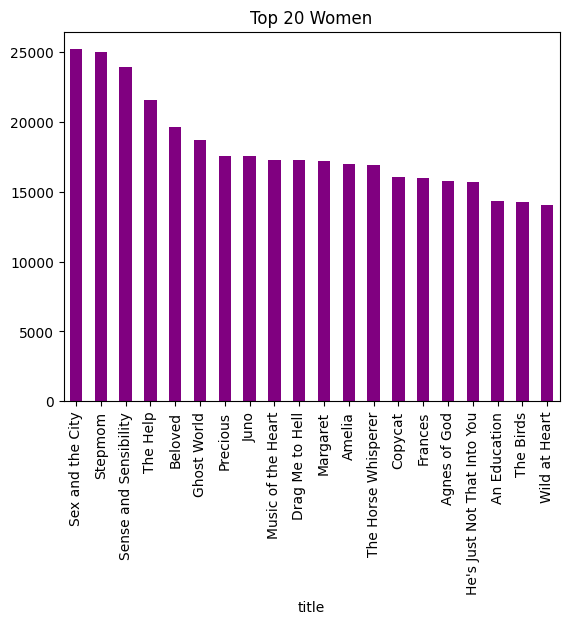

In [68]:
top20_women.plot(
    kind='bar',
    title='Top 20 Women',
    color='purple'
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

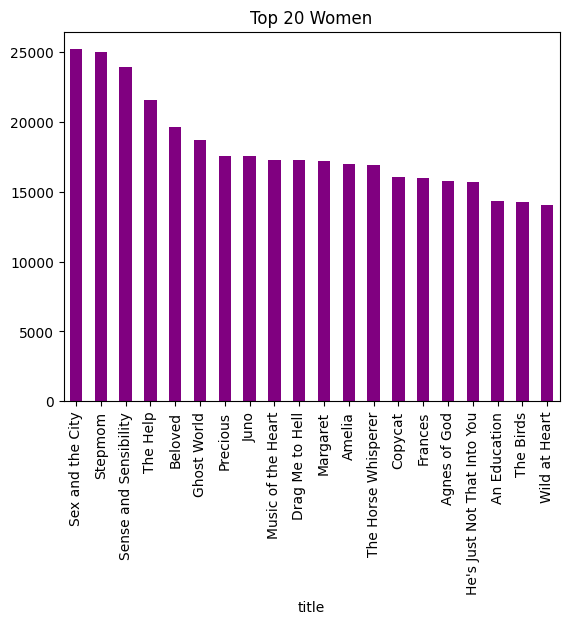

In [76]:
ax = top20_women.plot(
    kind='bar',
    title='Top 20 Women',
    color='purple'
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

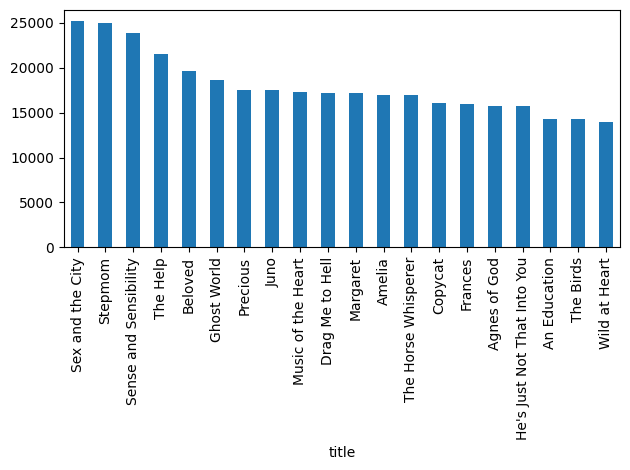

In [77]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [78]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [79]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [80]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

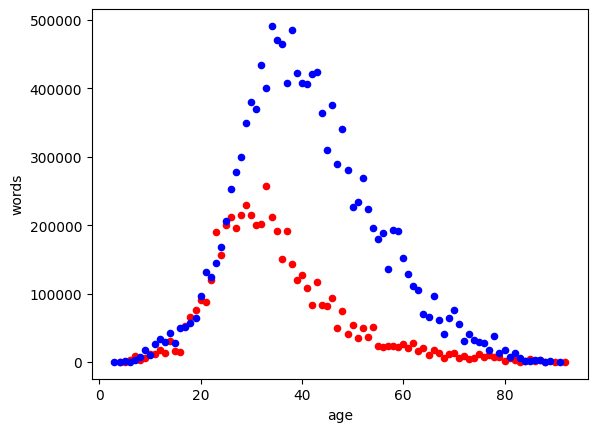

In [81]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

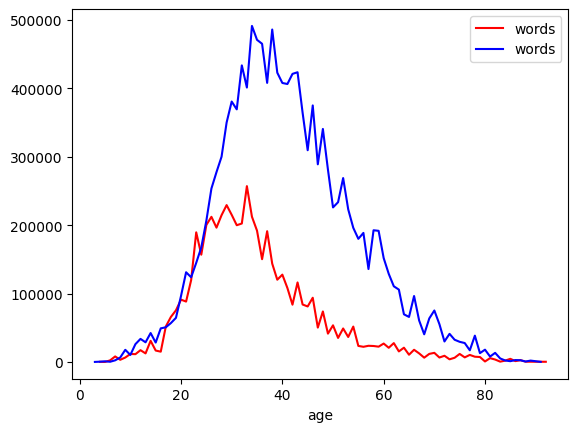

In [83]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

While I have used pandas and other EDA-related technologies before, I was once again impressed with the power these technologies have. When using EDA techniques, I often think about how time consuming it would be to create the graphs that pandas and other technologies create in just a few lines of code just 30 years ago. 

I also think about how powerful these technologies, especially when scaled to large datasets or even combinations of datasets. This both excites and frightens me, as the speed and accuracy of these technologies can show us very interesting information and statistics, but it can also allow for malicious users to collect and relate data connected to people's identities. On the excitening side, these technologies allow for easier interpretation of data used to improve our lives, such as data related to architecture, healthcare, etc. on the frightening side, these technologies allow for easier interpretation of data relating to our personal interests, family members, etc, which can result in some unnerving consequences, such as targeted advertising.

One thing about the speed and power of the EDA techniques that I believe could prove to be a problem in some cases is that there will be less manual review of data, which can result in incorrect or biased data being missed.

Another thing that I like about the EDA techniques mentioned was that it was very easy to manipulate and style the graphs, charts, etc that we created. I think that this is just a cool addition to the technologies we used and provides media sources with an opportunity to utilize these graphs, charts, etc without worry of them being "too ugly" to use. 

### 2. What were some of the hurdles that you encountered moving through the EDA process?

One of the most common hurdles that I encountered moving through the EDA process was just memorizing the different functions, parameters, etc that pandas has. However, this wasn't a big hurdle, as I could simply refer back to the lessons or do a google search in order to remember these functions and parameters.

Although not very common, I also ran into the problem of not immediately knowing what chain of filters or functions to use on a dataframe in order to get or display a desired dataframe or subset of the data. When I ran into this problem, I would try and problem solve, and, in some cases, I would refer back to the lessons to get an idea of what filters or functions may be needed.

While not necessarily related to the EDA process specifically, I also ran into an issue where matplotlib and pandas were not recognize modules, despite me having them downloaded. After a decent amount of scrolling through StackOverflow as well as google and youtube searches, I realized that this was due to two issues: 1) I needed to set an environment variable on my local machine point towards my directory containing python packages/modules. 2) My Python Path variable in VSCode was set to the "Python" rather than the directory containing my Python.exe file. The need for these changes was surprising to me and proved to be a fairly large hurdle because I didn't think they would be the issue, as, in the past, pandas has worked on my local machine, and Python was properly working with the Python Path set to "Python." I should also note that I did not install Anaconda, which may well have been the reason I ran into these issues. 

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

When going through the EDA process and when asked to choose a variable or question to pursue, I generally just chose to pursue random variables and questions, as I was not too familiar with the datasets to begin with. For example, when asked to pursue questions about a film of our choice, I chose Borderland without being familiar with the film. 

Something that I would like to pursue is questions relating to connections in data related to football statistics to see if there is a way to "beat the odds" when it comes to sports betting. I would like to pursue this because football is something I'm interested in and I feel as though that would be a good project to better my knowledge about the EDA process and its related technologies.

Another fun project could be finding connection between data related to current political talking points, I.E the wars, to see what my results of data relating to public opinion look like compared to the data that is displayed by popular media sites. 

One more fun idea is to choose random datasets and see if there are possibly connections to things you would never think of being connected. For example, maybe I get a dataset of people's favorite foods and a dataset of favorite football teams. Then I could try and find a connection between ages, foods, and favorite football teams, or something like that.

With these two different questions and project ideas in mind, I think it could also be fun to create some form of a media, such as a website, to display the data and allow other people to see not only my findings, but the power of the EDA process as well.